<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_5/Module_5_2_Decision_Trees_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

Чим зайнятися сьогодні?

- Якщо погода гарна і зараз літо, тоді я піду в ліс.
- Якщо погода гарна і зараз зима, тоді я піду на різдвяний ярмарок.
- Якщо погода погана і зараз літо, тоді я піду на роботу.
- Якщо погода погана і зараз зима, тоді я піду на заняття.
- Якщо я йду в ліс, тоді я роблю шашлики.
- Якщо я йду на різдвяний ярмарок, тоді я катаюся на ковзанах.
- Коли я працюю, я заробляю гроші.
- Коли я на занятті, я вивчаю Python for Data Science.



# Tree structure
![Tree](https://media.geeksforgeeks.org/wp-content/uploads/20221124153129/Treedatastructure.png)


**Глосарій**
- *Tree = дерево* — в інформатиці та програмуванні одна з найпоширеніших структур даних
- *To traverse the tree, Traversal = обійти дерево, Обхід*
- *Root = Корінь* — верхній вузол в дереві.
- *Child = Дитина* — вузол, безпосередньо приєднаний до іншого на шляху від кореня.
- *Parent = Батько* — зворотне поняття до дитини.
- *Siblings = Брати, сестри* — вузли з того ж батька.
- *Descendant = Нащадок* — вузол, досяжний послідовними переходами від батька до дитини.
- *Ancestor = Предок* — вузол, досяжний послідовними переходами від дитини до батька.
- *Leaf = Лист (також Зовнішній вузол)* — вузол, який не має дітей.
- *Inner node = Внутрішній вузол* — вузол, який має щонайменше одну дитину.
- *Degree = Степінь вузла* — кількість піддерев даного вузла.
- *Degree of a tree = Степінь дерева* — найвищий степінь, наявний в даному дереві.
- *Edge = Ребро* — з'єднання від одного вузла до іншого.
- *Path = Шлях* — послідовність вершин і ребер, що з'єднують вузол з нащадком.
- *Level = Рівень* — 1 + число зв'язків між вузлом і коренем.
- *Висота дерева* — число ребер найдовшого шляху між коренем і листом.
- *Висота вузла* — число ребер на найдовшому низхідному шляху від заданого вузла до листа.
- *Width = Ширина* - число вузлів на даному рівні.
- *Depth = Глибина* — число ребер від кореневого вузла дерева до заданого.
- *Forest = Ліс* — набір n ≥ 0 непересічних дерев.

Дерево без вузлів називається нульовим або порожнім деревом. Дерево, яке не є порожнім, складається з кореневого вузла і багатьох рівнів додаткових вузлів, які утворюють ієрархію.

Більше деталей:
- https://en.wikipedia.org/wiki/Tree_(data_structure)
- https://uk.wikipedia.org/wiki/Дерево_(структура_даних)
- https://www.geeksforgeeks.org/introduction-to-tree-data-structure-and-algorithm-tutorials/

# Decision Tree in Python

https://www.datacamp.com/tutorial/decision-tree-classification-python

![decision-tr](https://miro.medium.com/max/1000/1*LMoJmXCsQlciGTEyoSN39g.jpeg)

## Iris example

![iris](https://i.imgur.com/PQqYGaW.png)

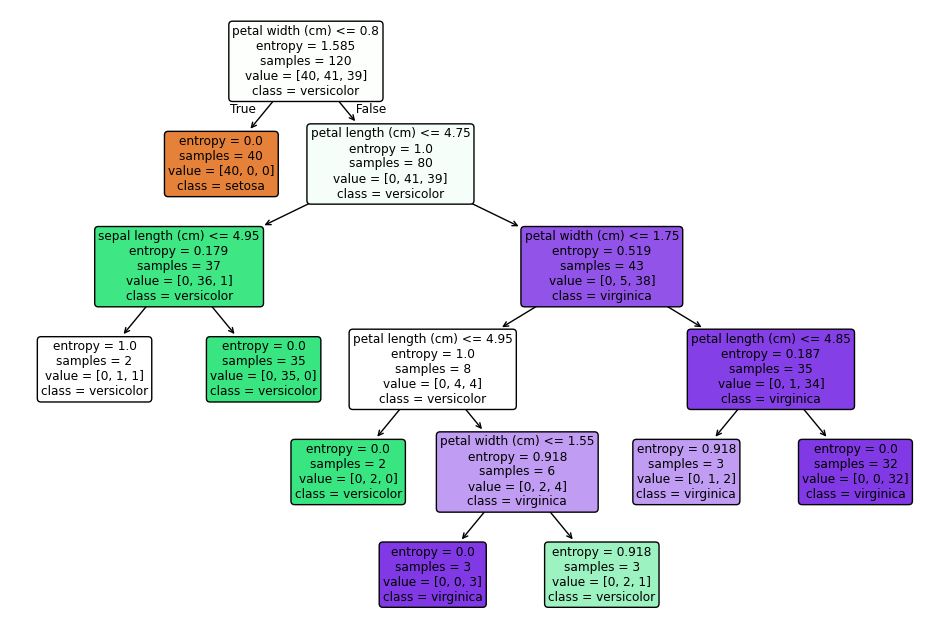

Decision Tree Test Accuracy: 1.0


In [1]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=2)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Test Accuracy: {accuracy}")


In [ ]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
dt_model.__dict__

{'criterion': 'entropy',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'n_features_in_': 4,
 'n_outputs_': 1,
 'classes_': array([0, 1, 2]),
 'n_classes_': np.int64(3),
 'max_features_': 4,
 'tree_': <sklearn.tree._tree.Tree at 0x7fc9f070a480>}

## Conditional probabilities: Naive Bayes

![bayes](https://scienceprog.com/wp-content/uploads/2016/07/Thomas_Bayes.png)

(Теорема Баєса: https://uk.wikipedia.org/wiki/Теорема_Баєса, описує ймовірність події, спираючись на обставини, що могли би бути пов'язані з цією подією)

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
sepal_length = iris.data[:, 0]  # Sepal length is the first feature
target = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sepal_length, target, test_size=0.2, random_state=42)

In [5]:
total_samples = len(y_train)
class_counts = {class_label: sum(y_train == class_label) for class_label in set(y_train)}
prior_probabilities = {class_label: count / total_samples for class_label, count in class_counts.items()}
prior_probabilities

{np.int64(0): np.float64(0.3333333333333333),
 np.int64(1): np.float64(0.3416666666666667),
 np.int64(2): np.float64(0.325)}

In [4]:
total_samples

120

In [6]:
class_counts

{np.int64(0): np.int64(40),
 np.int64(1): np.int64(41),
 np.int64(2): np.int64(39)}

In [7]:
class_counts.items()

dict_items([(np.int64(0), np.int64(40)), (np.int64(1), np.int64(41)), (np.int64(2), np.int64(39))])

In [8]:
prior_probabilities  # а-пріорі вірогідність належати до класу 0, 1 чи 2 - без урахування ознак

{np.int64(0): np.float64(0.3333333333333333),
 np.int64(1): np.float64(0.3416666666666667),
 np.int64(2): np.float64(0.325)}

In [9]:
X_train

array([4.6, 5.7, 6.7, 4.8, 4.4, 6.3, 6.4, 5.2, 5. , 5.2, 5.8, 6. , 6.7,
       5.4, 5.4, 5.5, 6.3, 6.4, 6.6, 7.2, 5.7, 7.6, 5.6, 5.1, 7.7, 5.8,
       5.2, 5. , 5.1, 5. , 6.3, 4.8, 5. , 5.1, 5.6, 5.1, 5.7, 7.7, 4.6,
       6.2, 5.7, 5.5, 6. , 5.8, 6. , 5.4, 6.2, 5.5, 5.4, 5. , 6.4, 5. ,
       5. , 5.5, 6.7, 4.9, 5.8, 5. , 5. , 5.9, 5.1, 6.9, 6. , 6.1, 7.7,
       5.5, 4.4, 4.3, 6. , 7.2, 4.6, 5.1, 4.4, 6.3, 6.3, 4.6, 6.8, 6.3,
       4.7, 6.1, 6.5, 6.2, 7. , 6.4, 5.1, 6.9, 5.9, 6.5, 5.7, 5.2, 6.1,
       4.5, 6.6, 5.5, 5.3, 5.6, 7.3, 6.7, 5.1, 4.9, 6.7, 7.2, 4.9, 6.7,
       4.9, 6.9, 7.4, 6.3, 5.7, 6.5, 6.3, 6.4, 5.6, 5.9, 5.4, 6.1, 4.9,
       5.8, 5.8, 7.1])

In [10]:
from scipy.stats import norm
likelihoods = {class_label: norm.pdf(X_train, loc=X_train[y_train == class_label].mean(), scale=X_train[y_train == class_label].std()) for class_label in set(y_train)}
# а-постеріоргі вірогідність належати до класу 0, 1 чи 2 - з урахуванням довжини чашолистка

In [11]:
likelihoods  # ймовірності

{np.int64(0): array([6.13484831e-01, 1.48213698e-01, 8.50343449e-06, 9.79728007e-01,
        2.78159610e-01, 1.11361778e-03, 3.71559811e-04, 9.48603487e-01,
        1.13291976e+00, 9.48603487e-01, 8.02588658e-02, 1.84733782e-02,
        8.50343449e-06, 5.75124959e-01, 5.75124959e-01, 3.96755486e-01,
        1.11361778e-03, 3.71559811e-04, 3.24681722e-05, 3.12245921e-09,
        1.48213698e-01, 1.30461510e-12, 2.52482714e-01, 1.07936403e+00,
        1.52439940e-13, 8.02588658e-02, 9.48603487e-01, 1.13291976e+00,
        1.07936403e+00, 1.13291976e+00, 1.11361778e-03, 9.79728007e-01,
        1.13291976e+00, 1.07936403e+00, 2.52482714e-01, 1.07936403e+00,
        1.48213698e-01, 1.52439940e-13, 6.13484831e-01, 3.07887147e-03,
        1.48213698e-01, 3.96755486e-01, 1.84733782e-02, 8.02588658e-02,
        1.84733782e-02, 5.75124959e-01, 3.07887147e-03, 3.96755486e-01,
        5.75124959e-01, 1.13291976e+00, 3.71559811e-04, 1.13291976e+00,
        1.13291976e+00, 3.96755486e-01, 8.50343449e

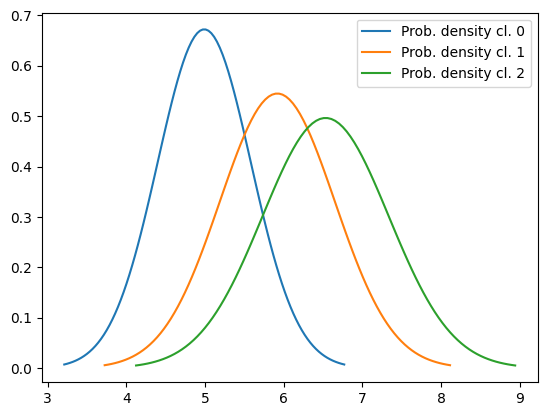

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

for class_label in set(y_train):  # 0, 1, 2
    mu = X_train[y_train == class_label].mean()  # mean
    variance = X_train[y_train == class_label].std()  # variance
    sigma = math.sqrt(variance)  # standard deviation
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)  # normal distribution based on given parameters
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label=f'Prob. density cl. {class_label}')
plt.legend()
plt.show()
#
# continuous (безперервні) values -> probability density: густина ймовірності, https://uk.wikipedia.org/wiki/Густина_ймовірності

In [13]:
# перший приклад
X_train[0]

np.float64(4.6)

In [14]:
# вірогідність належати до класу 0, 1 чи 2 в залежності від ознаки довжини чашолистка
likelihoods[0][0], likelihoods[1][0], likelihoods[2][0]

(np.float64(0.6134848307960548),
 np.float64(0.03584106735857552),
 np.float64(0.006961535714191303))

In [15]:
# a-priori probabilities vs. a-posteriori probabilities - to make a more confident prediction regarding true class
print("a-priori probabilities", prior_probabilities)
posterior_probabilities_0 = {0: likelihoods[0][0], 1: likelihoods[1][0], 2: likelihoods[2][0]}
print("a-posteriori probabilities", posterior_probabilities_0)

a-priori probabilities {np.int64(0): np.float64(0.3333333333333333), np.int64(1): np.float64(0.3416666666666667), np.int64(2): np.float64(0.325)}
a-posteriori probabilities {0: np.float64(0.6134848307960548), 1: np.float64(0.03584106735857552), 2: np.float64(0.006961535714191303)}


In [16]:
y_train[0]

np.int64(0)

## Splitting the features on information gain

Information gain is based on entropy: measurement of impurity of class distribution

![impurity](https://ekamperi.github.io/images/decision_trees/pure_vs_impure_node.png)

![entropy](https://digitalpress.fra1.cdn.digitaloceanspaces.com/mhujhsj/2022/11/image-12.png)
- entropy = 0 -> minimum impurity
- entropy = 1 -> 50/50 impurity

Entropy: https://victorzhou.com/blog/information-gain/

Simple example: https://www.saedsayad.com/decision_tree.htm

In [17]:
prior_probabilities

{np.int64(0): np.float64(0.3333333333333333),
 np.int64(1): np.float64(0.3416666666666667),
 np.int64(2): np.float64(0.325)}

In [18]:
# Load the Iris dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [19]:
# Entropy of the a-priori probability distribution of setosa classes (1), one vs. rest

total_samples = len(y_train)

pred_setosa = np.array([1 if class_ == 1 else 0 for class_ in y_train])
class_counts_setosa = {class_label: sum(pred_setosa == class_label) for class_label in set(pred_setosa)}
prior_probabilities_setosa = {class_label: count / total_samples for class_label, count in class_counts_setosa.items()}
prior_probabilities_setosa

{np.int64(0): np.float64(0.6583333333333333),
 np.int64(1): np.float64(0.3416666666666667)}

In [20]:
prior_probabilities_array_setosa = np.array([prob for key, prob in prior_probabilities_setosa.items()])
prior_probabilities_array_setosa

array([0.65833333, 0.34166667])

In [21]:
entropy_ = -np.sum(prior_probabilities_array_setosa*(np.log(prior_probabilities_array_setosa)))
entropy_

np.float64(0.6421347837839517)

In [22]:
class_counts_setosa

{np.int64(0): np.int64(79), np.int64(1): np.int64(41)}

In [23]:
# equivalent
from scipy.stats import entropy
entropy(prior_probabilities_array_setosa)

np.float64(0.6421347837839517)

In [24]:
# Entropy conditional on the petal length <= 2.45, for class setosa
petal_lengths = X_train[:, 2]
petal_len_smaller_than_2_45 = np.array([1 if p_l <= 2.45 else 0 for p_l in petal_lengths])

In [25]:
petal_len_smaller_than_2_45

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
# entropy_setosa = - (prob(NON-petal_len_smaller_than_2_45)*entropy(pred_setosa_petal_length, pred_NON_setosa_petal_length)
#                         + prob(petal_len_smaller_than_2_45)*entropy(pred_setosa_petal_length, pred_NON_setosa_petal_length))

In [26]:
class_probs_petal_length = np.array([(total_samples-np.sum(petal_len_smaller_than_2_45))/total_samples, (np.sum(petal_len_smaller_than_2_45))/total_samples])
class_probs_petal_length

array([0.66666667, 0.33333333])

In [27]:
import numpy.ma as ma
group_1 = ma.masked_where(petal_len_smaller_than_2_45 == 1, petal_len_smaller_than_2_45).mask
group_2 = ma.masked_where(petal_len_smaller_than_2_45 == 0, petal_len_smaller_than_2_45).mask

In [28]:
group_1

array([ True,  True, False,  True,  True, False, False,  True,  True,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False, False,  True,  True,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False])

In [29]:
group_2

array([False, False,  True, False, False,  True,  True, False, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False, False,  True,  True, False, False, False,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True])

In [30]:
petal_len_smaller_than_2_45

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [35]:
len(petal_len_smaller_than_2_45[group_1]), len(petal_len_smaller_than_2_45[group_2])

(40, 80)

In [34]:
petal_len_smaller_than_2_45[group_1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
petal_len_smaller_than_2_45[group_2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
pred_setosa

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [32]:
pred_setosa[group_1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
len(petal_len_smaller_than_2_45[group_2])

80

In [37]:
pred_setosa

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [38]:
pred_setosa[group_1]  # petal <= 2.45 == True

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
pred_setosa[group_2]  # petal <= 2.45 == False

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [40]:
np.sum(pred_setosa[group_2])

np.int64(41)

In [41]:
len(pred_setosa[group_2]) - np.sum(pred_setosa[group_2])

np.int64(39)

In [43]:
total_samples_group_1 = len(petal_len_smaller_than_2_45[group_1])
total_samples_group_1

40

In [44]:
class_probs_setosa_group_1 = np.array([(total_samples_group_1-np.sum(pred_setosa[group_1]))/total_samples_group_1, (np.sum(pred_setosa[group_1]))/total_samples_group_1])
class_probs_setosa_group_1  #

array([1., 0.])

In [45]:
entropy_setosa_group_1 = entropy(class_probs_setosa_group_1)
class_probs_setosa_group_1, "Entropy:", entropy_setosa_group_1

(array([1., 0.]), 'Entropy:', np.float64(0.0))

In [46]:
pred_setosa[group_2]

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [47]:
pred_setosa

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [48]:
np.sum(pred_setosa[group_1])

np.int64(0)

In [49]:
total_samples_group_2 = len(petal_len_smaller_than_2_45[group_2])
class_probs_setosa_group_2 = np.array([(total_samples_group_2-np.sum(pred_setosa[group_2]))/total_samples_group_2, (np.sum(pred_setosa[group_2]))/total_samples_group_2])
class_probs_setosa_group_2

array([0.4875, 0.5125])

In [50]:
entropy_setosa_group_2 = entropy(class_probs_setosa_group_2)
class_probs_setosa_group_2, "Entropy:", entropy_setosa_group_2

(array([0.4875, 0.5125]), 'Entropy:', np.float64(0.6928346479997213))

In [51]:
entropy_conditional = (class_probs_petal_length[0]*entropy_setosa_group_1) + (class_probs_petal_length[1]*entropy_setosa_group_2)
entropy_conditional

np.float64(0.23094488266657376)

In [52]:
i_gain = entropy_ - entropy_conditional
i_gain

np.float64(0.41118990111737797)

# Random Forest: Making predictions more robust

- Ensemble learning: https://neptune.ai/blog/ensemble-learning-guide
- Bagging & Boosting (Bootstrapping): https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

Result: Random Forest

![random-forest](https://www.nvidia.com/content/dam/en-zz/Solutions/glossary/data-science/random-forest/img-3.png)

In [53]:
from sklearn.ensemble import RandomForestClassifier
# Load the Iris dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

model = RandomForestClassifier(max_depth=1, random_state=0, n_estimators=120)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 1.0
